# 01 - Univariate and Multivariate analysis

Before applying preprocessing techniques and machine learning models, it's important to understand better the characteristic of the dataset. Therefore, this is the goal of this first notebook.

## Content identification

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
import seaborn as sns
from utils import dataPreparationFunctions as dataPrepare, graphFunctions as graph

register_matplotlib_converters()

In [3]:
data = pd.read_csv('../datasets/covtype.data', header=None, sep=',', decimal='.')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


The dataset has no header explicit on the .data, but it's indicated on the .info, so we are going to include that manually in the dataframe to make analysis easier.

In [4]:
column_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
               'Wilderness_Area-1', 'Wilderness_Area-2', 'Wilderness_Area-3', 'Wilderness_Area-4']
qtd_soil_types = 40
for i in range(qtd_soil_types):
    column_names.append('Soil_Type-'+str(i+1))
column_names.append('Cover_Type')   
column_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area-1',
 'Wilderness_Area-2',
 'Wilderness_Area-3',
 'Wilderness_Area-4',
 'Soil_Type-1',
 'Soil_Type-2',
 'Soil_Type-3',
 'Soil_Type-4',
 'Soil_Type-5',
 'Soil_Type-6',
 'Soil_Type-7',
 'Soil_Type-8',
 'Soil_Type-9',
 'Soil_Type-10',
 'Soil_Type-11',
 'Soil_Type-12',
 'Soil_Type-13',
 'Soil_Type-14',
 'Soil_Type-15',
 'Soil_Type-16',
 'Soil_Type-17',
 'Soil_Type-18',
 'Soil_Type-19',
 'Soil_Type-20',
 'Soil_Type-21',
 'Soil_Type-22',
 'Soil_Type-23',
 'Soil_Type-24',
 'Soil_Type-25',
 'Soil_Type-26',
 'Soil_Type-27',
 'Soil_Type-28',
 'Soil_Type-29',
 'Soil_Type-30',
 'Soil_Type-31',
 'Soil_Type-32',
 'Soil_Type-33',
 'Soil_Type-34',
 'Soil_Type-35',
 'Soil_Type-36',
 'Soil_Type-37',
 'Soil_Type-38',
 'Soil_Type-39',
 'Soil_Type-40',
 'Co

In [5]:
data.columns = column_names
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type-32,Soil_Type-33,Soil_Type-34,Soil_Type-35,Soil_Type-36,Soil_Type-37,Soil_Type-38,Soil_Type-39,Soil_Type-40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
aux = []
qtd_soil_types = 40
for i in range(qtd_soil_types):
    aux.append('Soil_Type-'+str(i+1))
print(data[aux].sum(axis=1).unique())

aux2 = []
qtd_wilderness_areas = 4
for i in range(qtd_wilderness_areas):
    aux2.append('Wilderness_Area-'+str(i+1))
print(data[aux2].sum(axis=1).unique())

[1]
[1]


We have 55 columns, where 44 are binaries. In those 44, there will be only one value 1 on the 40 `Soil Types` and one value 1 on the 4 `Wilderness Areas`.

In [7]:
data.shape

(581012, 55)

We already can see that this dataset has much more records than the parkinson speech dataset, but much less features, therefore some approaches and models will change.

## Variables Type and Domain

In [8]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area-1                     int64
Wilderness_Area-2                     int64
Wilderness_Area-3                     int64
Wilderness_Area-4                     int64
Soil_Type-1                           int64
Soil_Type-2                           int64
Soil_Type-3                           int64
Soil_Type-4                           int64
Soil_Type-5                           int64
Soil_Type-6                           int64
Soil_Type-7                           int64
Soil_Type-8                           int64
Soil_Type-9                     

In [9]:
binary_types = aux + aux2
binary_types.append('Cover_Type')
convert_dict = {}
for col in binary_types:
    convert_dict[col] = 'category'
analysis = data.astype(convert_dict)
analysis.dtypes

Elevation                                int64
Aspect                                   int64
Slope                                    int64
Horizontal_Distance_To_Hydrology         int64
Vertical_Distance_To_Hydrology           int64
Horizontal_Distance_To_Roadways          int64
Hillshade_9am                            int64
Hillshade_Noon                           int64
Hillshade_3pm                            int64
Horizontal_Distance_To_Fire_Points       int64
Wilderness_Area-1                     category
Wilderness_Area-2                     category
Wilderness_Area-3                     category
Wilderness_Area-4                     category
Soil_Type-1                           category
Soil_Type-2                           category
Soil_Type-3                           category
Soil_Type-4                           category
Soil_Type-5                           category
Soil_Type-6                           category
Soil_Type-7                           category
Soil_Type-8  

## Missing values

In [10]:
mv, count_na = dataPrepare.get_missing_values(analysis)
print('Total of missing values on dataset:', count_na)

Total of missing values on dataset: 0


## Variables Distribuition

In [11]:
analysis.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [12]:
analysis.describe(include='category')

,Wilderness_Area-1,Wilderness_Area-2,Wilderness_Area-3,Wilderness_Area-4,Soil_Type-1,Soil_Type-2,Soil_Type-3,Soil_Type-4,Soil_Type-5,Soil_Type-6,...,Soil_Type-32,Soil_Type-33,Soil_Type-34,Soil_Type-35,Soil_Type-36,Soil_Type-37,Soil_Type-38,Soil_Type-39,Soil_Type-40,Cover_Type
count,581012,581012,581012,581012,581012,581012,581012,581012,581012,581012,...,581012,581012,581012,581012,581012,581012,581012,581012,581012,581012
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,7
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
freq,320216,551128,327648,544044,577981,573487,576189,568616,579415,574437,...,528493,535858,579401,579121,580893,580714,565439,567206,572262,283301


<Figure size 432x288 with 0 Axes>

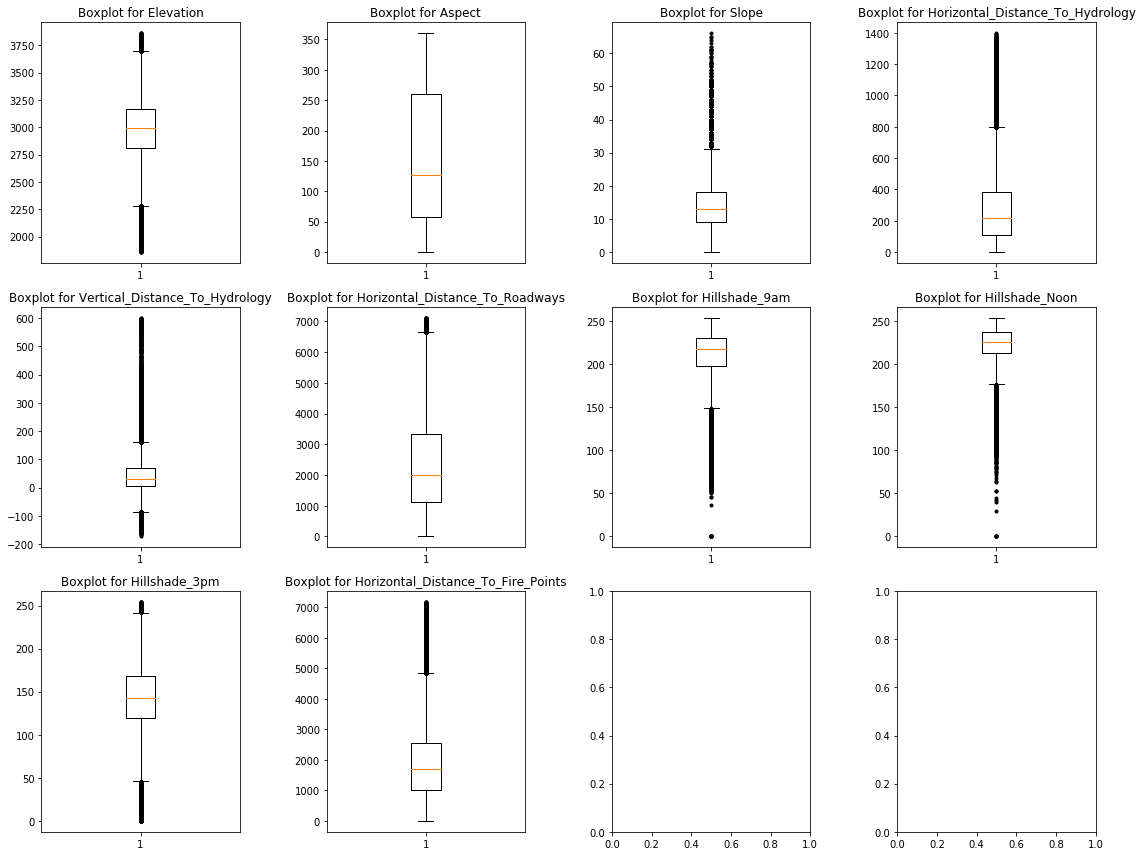

In [13]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(analysis[columns[n]].dropna().values, sym='k.')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

There are so many outliers that we may lose a lot of information if remove them, especially because some specific Forest Cover Types may have these characteristics.

<Figure size 432x288 with 0 Axes>

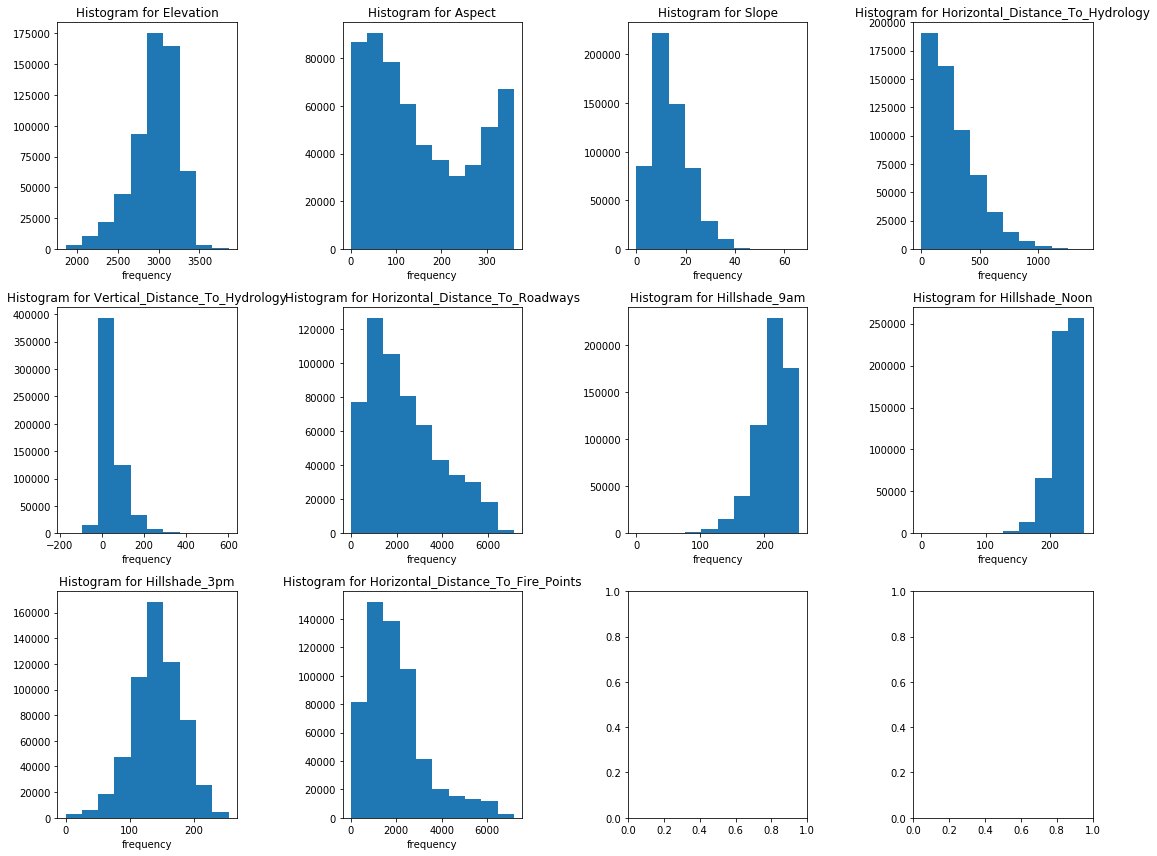

In [14]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0 , 0
for n in range(len(columns)):
    if (columns[n] == 'Cover_Type'):
        continue
#     for c in classes:
#         covertypes.append(data[data['Cover_Type'] == c][columns[n]])
    graph.histogram(axs[i, j], analysis[columns[n]], 'Histogram for %s'%columns[n], 'frequency')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

To try to understand better the distributions, it will be plotted some histograms with different covertypes in different colors (since there are 7 possibilities, it can be too much information for a graph, so just a few will be plotted).

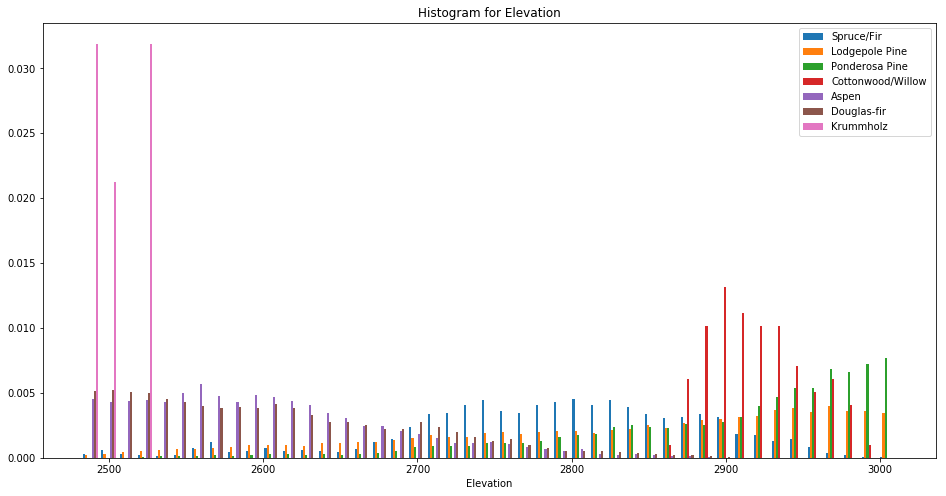

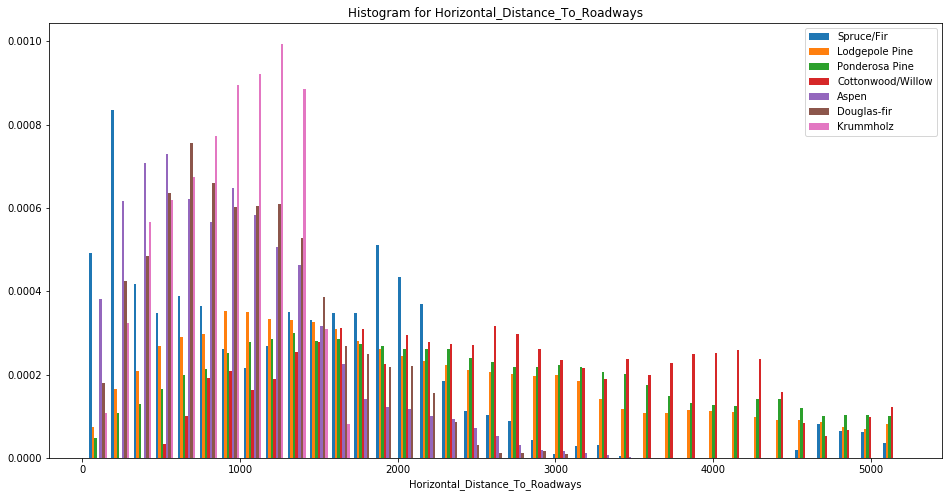

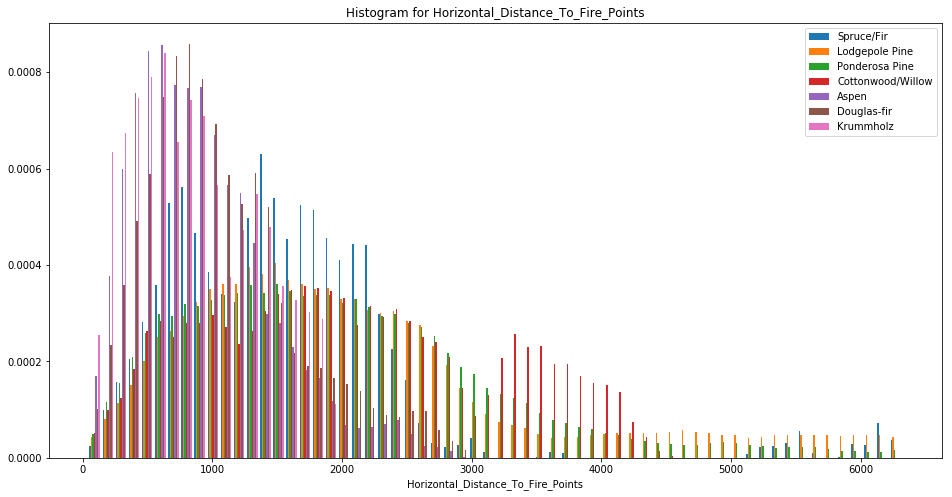

In [15]:
def histogram_with_more_classes(ax: plt.Axes, series, title = '', xlabel = '', ylabel = '', label_classes = ['0', '1'], density = True):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.hist(series, 'auto', density=density, label=label_classes)
    ax.legend(loc='best')

classes = pd.unique(analysis['Cover_Type'])
columns_to_plot = [0, 5, 9]

for n in columns_to_plot:
    fig = plt.figure(figsize=(16, 8))
    covertypes = []
    for c in classes:
        covertypes.append(data[data['Cover_Type'] == c][columns[n]])
    histogram_with_more_classes(plt.gca(), covertypes, 'Histogram for %s'%columns[n], columns[n], label_classes=['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'])
    plt.show()

With the first graph, we can see that almost every class has a peak in a different range. The easiest one to notice is the Krummholz for lower Elevations.
For the next two graphs, we can see that the classes don't have the same distributions, but it's harder to say what is the pattern just by looking. Anyway, it's enough to know that these features probably are important.

<Figure size 432x288 with 0 Axes>

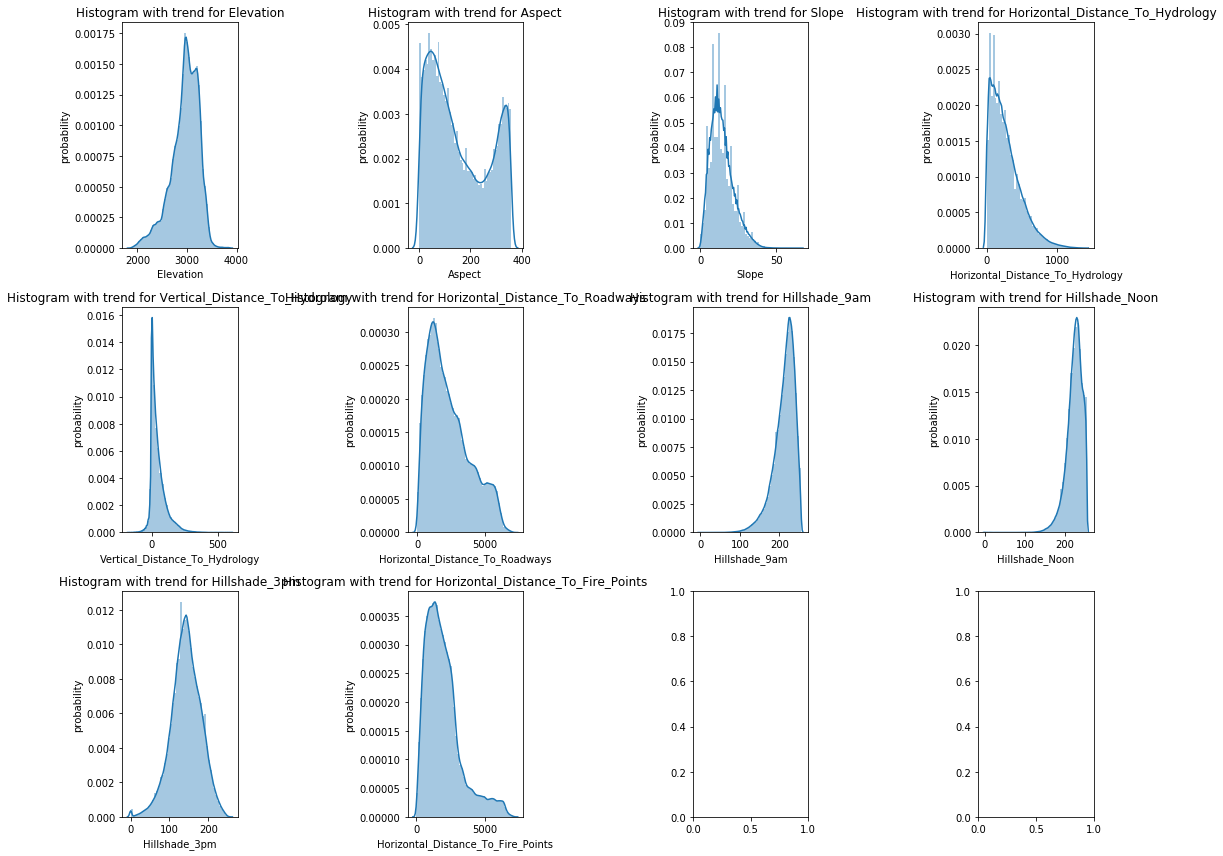

In [16]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(analysis[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Comparing the distributions with some known ones:

<Figure size 432x288 with 0 Axes>

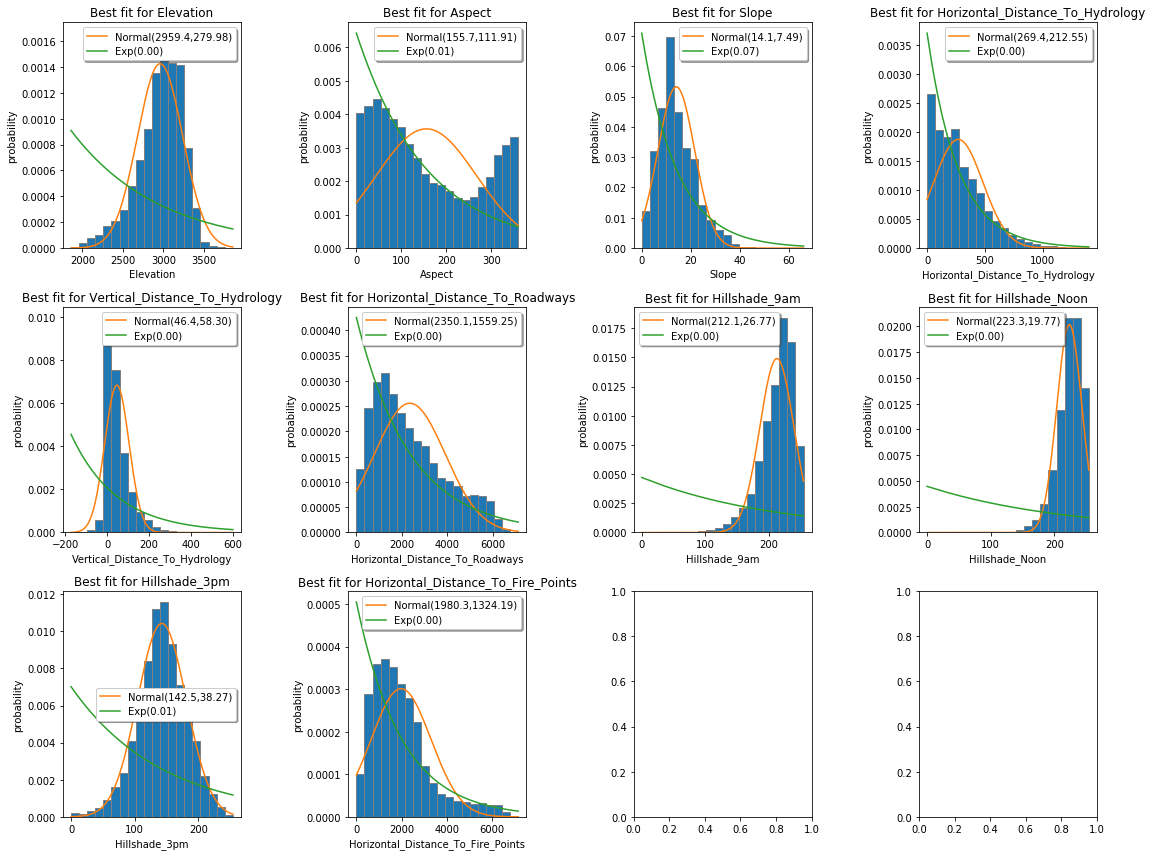

In [17]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = graph.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    graph.histogram_with_distributions(axs[i, j], analysis[columns[n]].dropna(), title='Best fit for %s'%columns[n], xlabel=columns[n], ylabel='probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Checking the effects of granularity:

<Figure size 432x288 with 0 Axes>

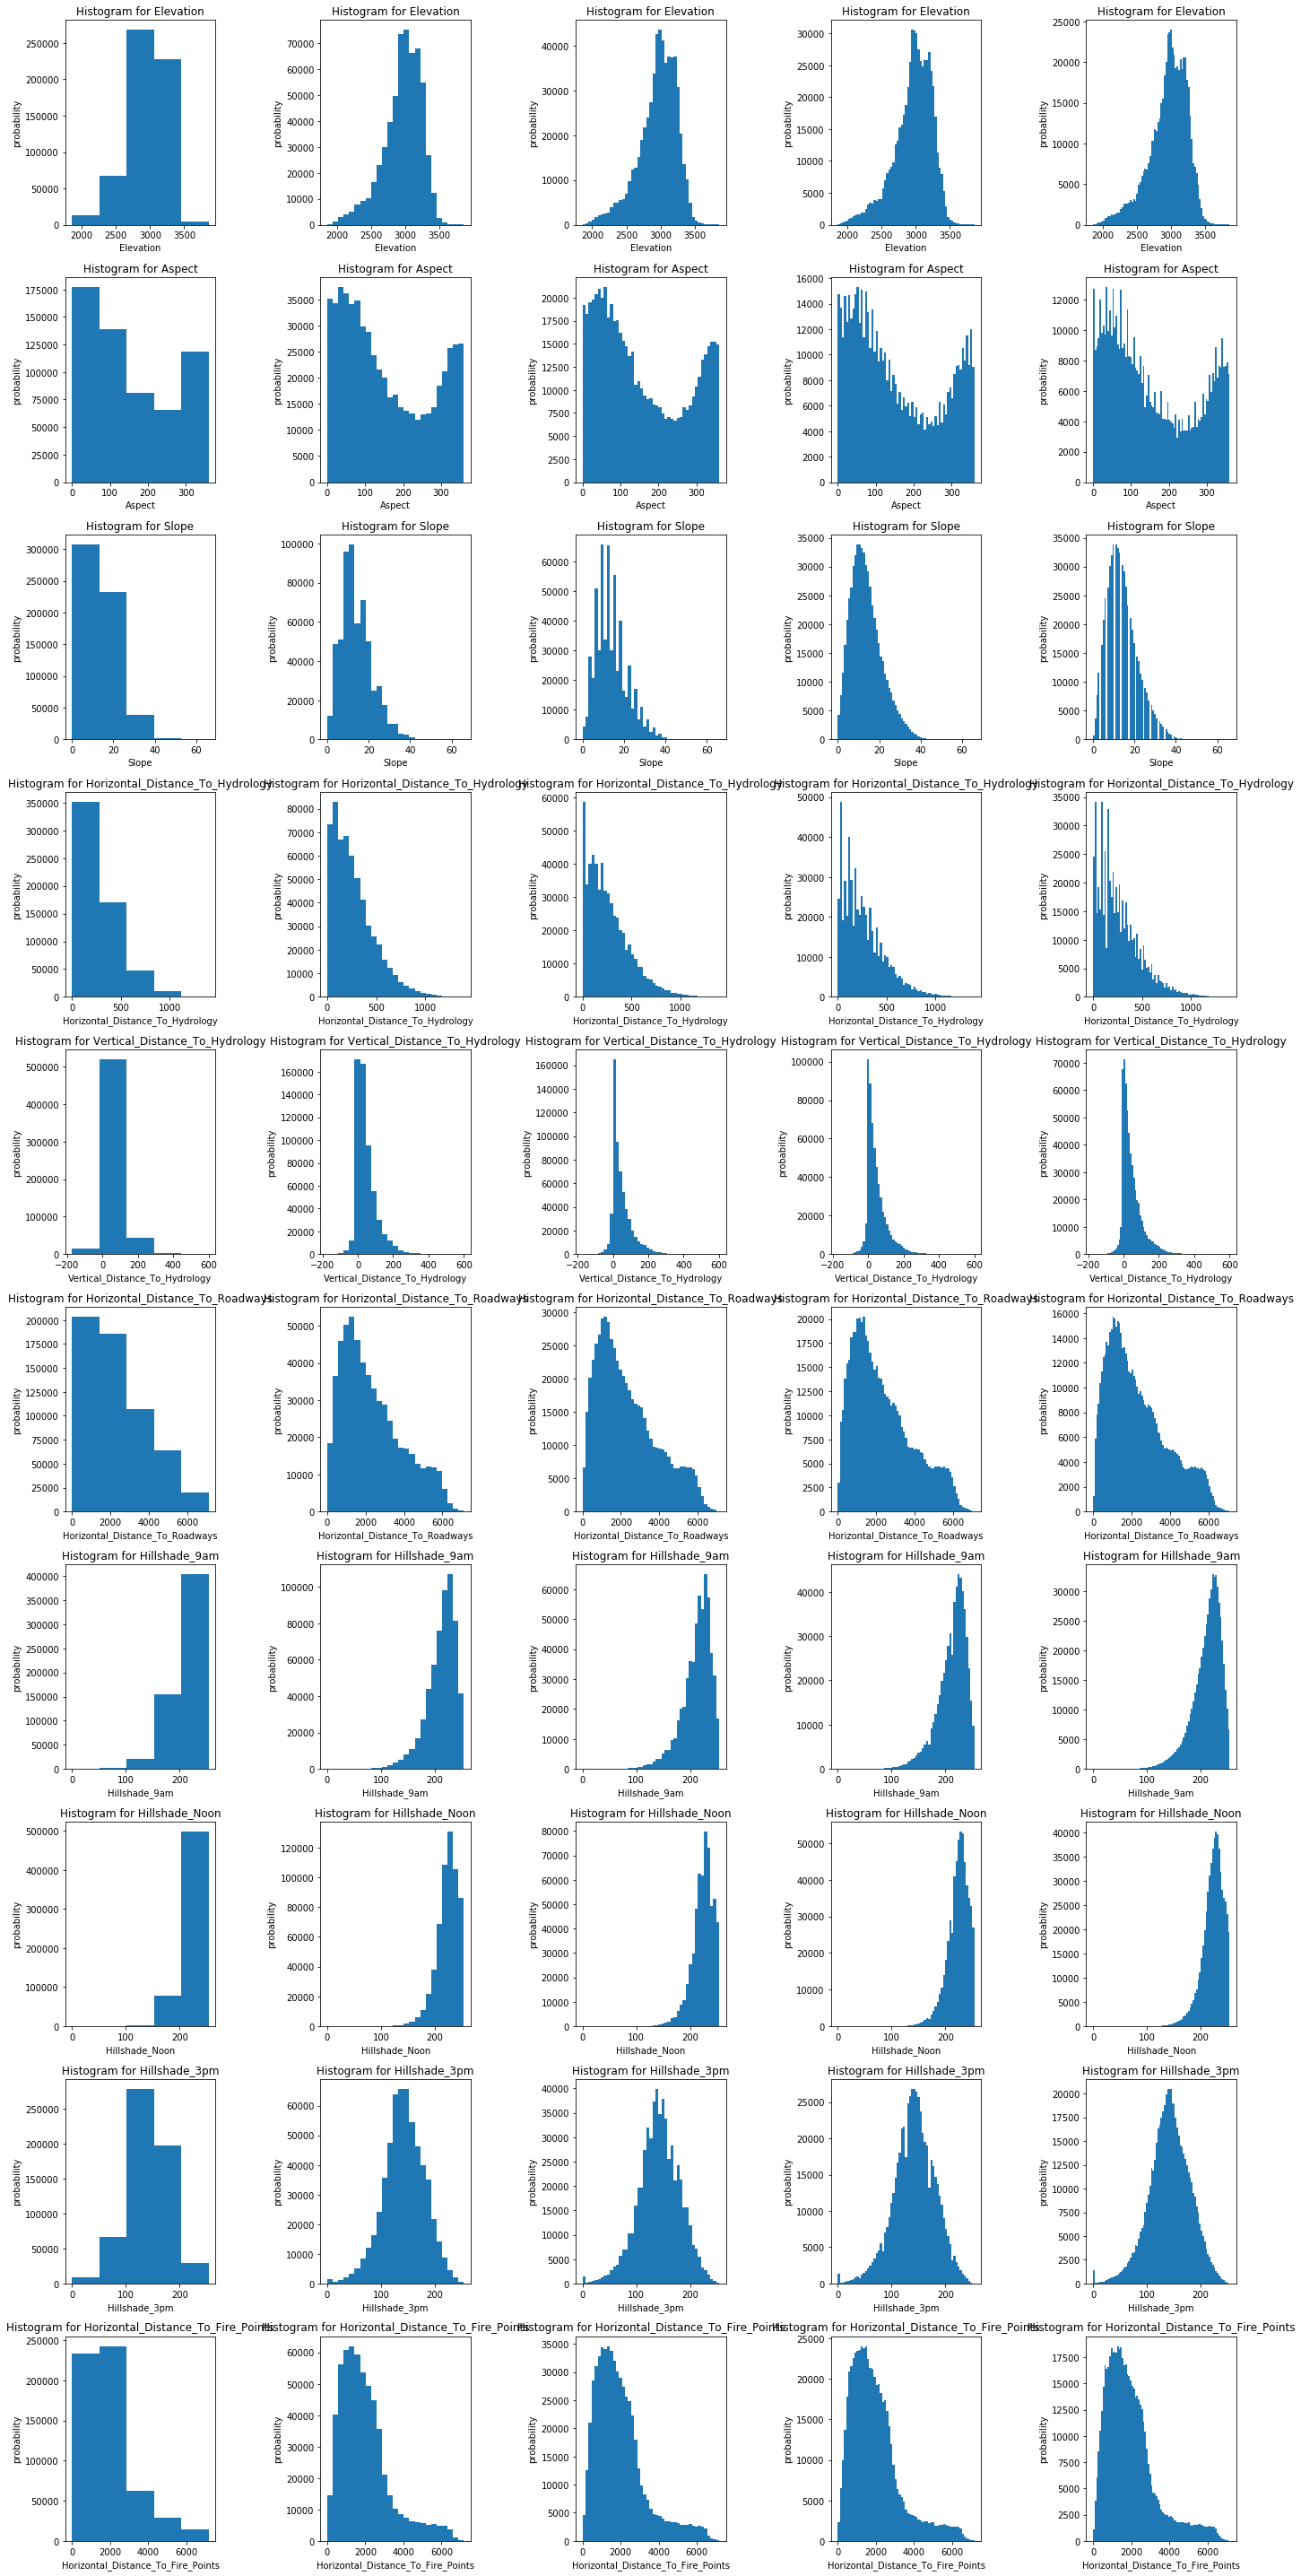

In [18]:
columns = analysis.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        graph.histogram(axs[i, j], analysis[columns[i]].dropna().values, 'Histogram for %s'%columns[i], columns[i], 'probability', bins[j])
fig.tight_layout()
plt.show()

## Multivariate analysis

Here, we'll see the correlation and the sparsity of variables to try to get insights about which features can differentiate better the target.

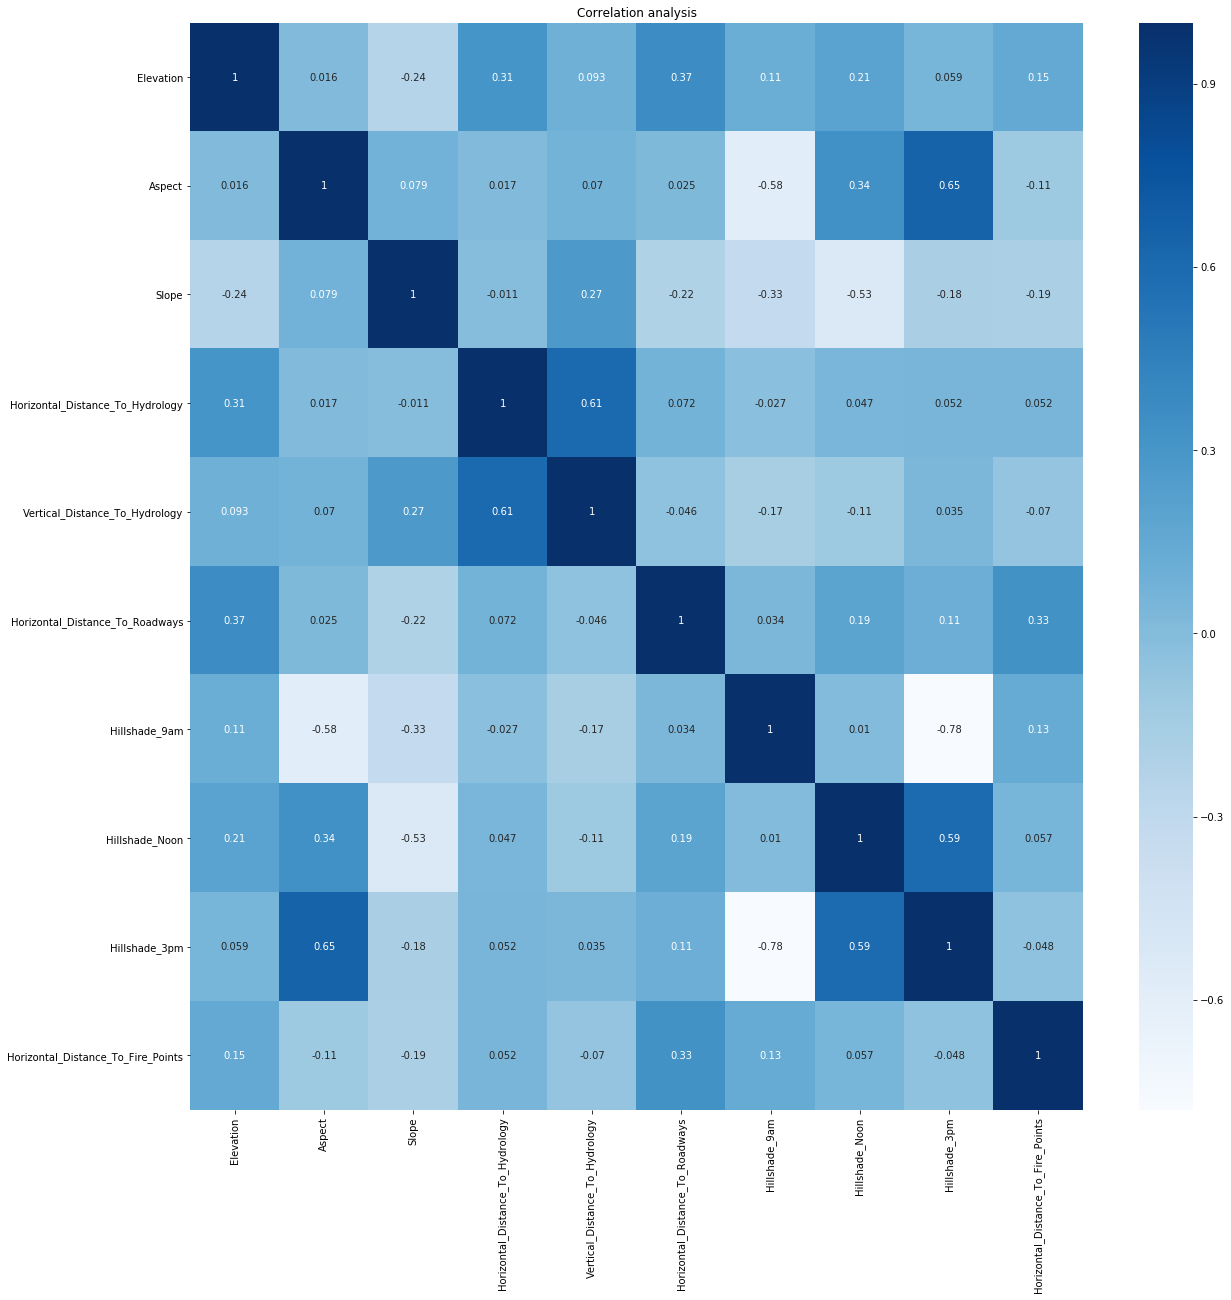

In [19]:
fig = plt.figure(figsize=[20, 20])
analysis_corr = analysis.corr()
sns.heatmap(analysis_corr, xticklabels=analysis_corr.columns, yticklabels=analysis_corr.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

There is no signigicative level of correlation in the numerical variables, since the highest absolute value is 0.78.

To see the scatter plot, we will use an undersampled dataset that will be shown in the next notebook. This way, the graph will have balanced data and not a really unequal number of dots.

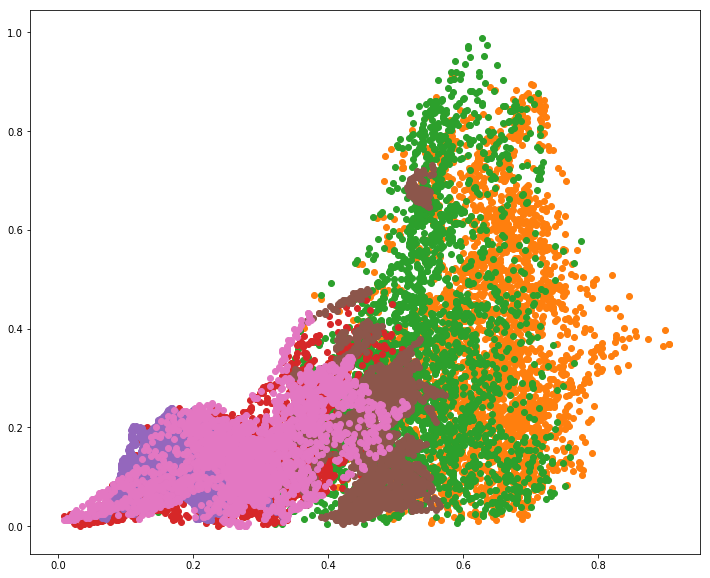

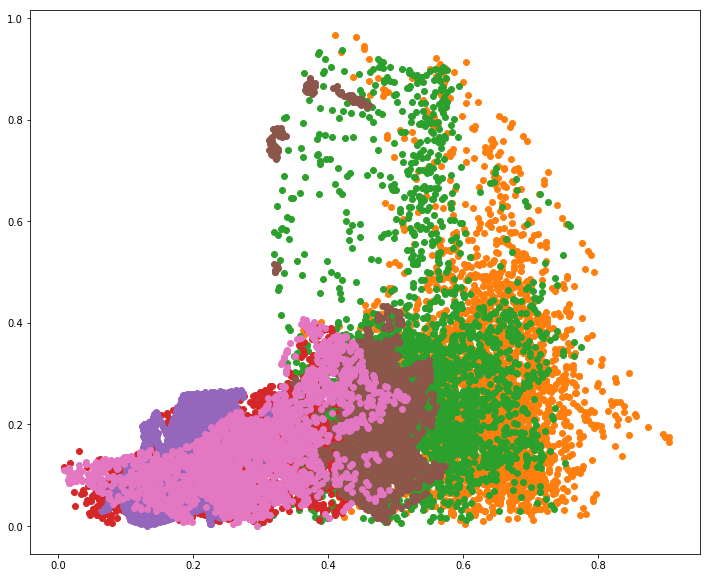

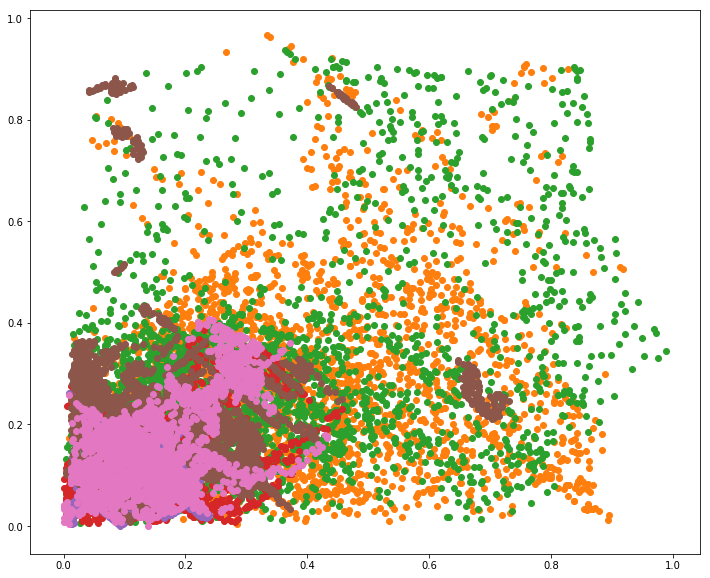

In [20]:
balanced_data = pd.read_csv('../datasets/covtype_data_preparation.csv', decimal='.', sep=',')

fig = plt.figure(figsize=(12, 10))
for i in range(7):
    plt.gca().scatter(balanced_data[balanced_data['Cover_Type']==i][columns[0]], balanced_data[balanced_data['Cover_Type']==i][columns[5]])
fig = plt.figure(figsize=(12, 10))
for i in range(7):
    plt.gca().scatter(balanced_data[balanced_data['Cover_Type']==i][columns[0]], balanced_data[balanced_data['Cover_Type']==i][columns[9]])
fig = plt.figure(figsize=(12, 10))
for i in range(7):
    plt.gca().scatter(balanced_data[balanced_data['Cover_Type']==i][columns[5]], balanced_data[balanced_data['Cover_Type']==i][columns[9]])

We can see that, for these features, most of the classes concentrate near the origin, except the green and the orange ones (classes 2 and 3), so it will probably be easier to separate these 2 from the rest in a part of the space (which can be done by a decision tree, for example).

In [21]:
analysis.to_csv('../datasets/covtype_data_exploration.csv', index=False)